# Sentiment Analysis using Linear Regression and Bag of Words

### Setup

In [3]:
import numpy as np 
import pandas as pd

In [4]:
train = pd.read_csv("../train.csv")
val = pd.read_csv("../val.csv")

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
vectorizer = CountVectorizer(
    max_features = 40000
)

In [7]:
train_words = train.iloc[:,2]
train_labels = train.iloc[:,1]

In [8]:
train_features = vectorizer.fit_transform(train_words)

In [9]:
val_words = val.iloc[:,2]
val_labels = val.iloc[:,1]
val_features = vectorizer.transform(val_words)

### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [11]:
lin_model = LinearRegression()

In [12]:
lin_model = lin_model.fit(train_features, train_labels)

In [13]:
val_pred = lin_model.predict(val_features)

In [14]:
print('MAE:', metrics.mean_absolute_error(val_pred, val_labels))  

MAE: 0.0876880905416112


In [15]:
# for i in range (0, 100): 
#     print(val_words[i])
#     print("prediction:")
#     print(val_pred[i])
#     print("label:")
#     print(val_labels[i])

### Graph

In [18]:
import seaborn as sns

In [20]:
sns.set(style="white")

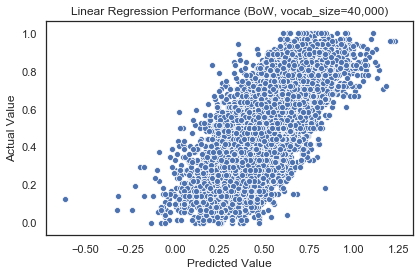

In [31]:
sns.scatterplot(x=val_pred, y=val_labels, palette="muted")
plt.xlabel("Predicted Value", fontsize="medium")
plt.ylabel("Actual Value", fontsize="medium")
plt.title("Linear Regression Performance (BoW, vocab_size=40,000)")
plt.tight_layout()
plt.savefig("lin_reg_scatter.png", bbox_inches="tight", dpi=400)